# Zillow Neighborhood Shapes

Import python scientific suite

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy
import pylab

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

Here, we set the directory where the neighborhood shape files are located

In [56]:
hood_dir = '/Volumes/1TB_BAY/zillow_sets/neighborhood_shapes/' #on my computer, the location of the neighborhood shape files
file_dir = '/Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/'

We will import the 'shapefile' package, which allows us to read in the neighborhood shape information, and also the 'Basemap' package, which allows us to superimpose background map imagery.

If you have conda, you can get the Basemap package by typing 

#conda install -c anaconda basemap=1.0.7

at the terminal

In [31]:
import shapefile
from mpl_toolkits.basemap import Basemap

In [5]:
sf = shapefile.Reader(hood_dir + 'ZillowNeighborhoods-CA.shp') #load in the california neighborhoods

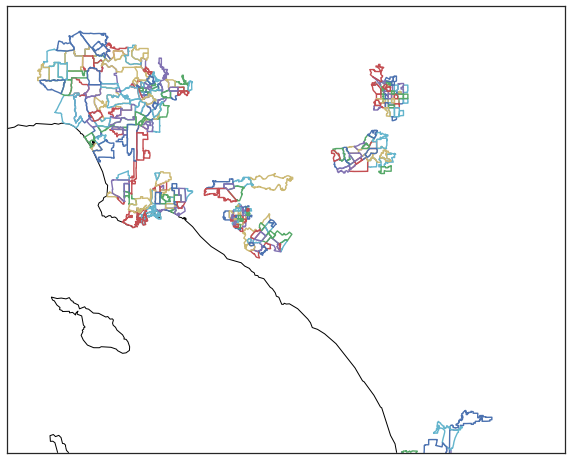

In [65]:
pylab.rcParams['figure.figsize'] = (10,8)

m = Basemap(width=200000,height=160000,projection='lcc',
            resolution='h',lat_1=34.2,lat_2=34.7,lat_0=33.7, lon_0=-117.7)
m.drawcoastlines()

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    m.plot(x,y)

let's read in the yelp dataset

In [57]:
b = pd.read_csv(file_dir + 'yelp_academic_dataset_business.csv') #b for business

/Users/Franklin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (1,4,7,17,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(-117.7, -118.7)

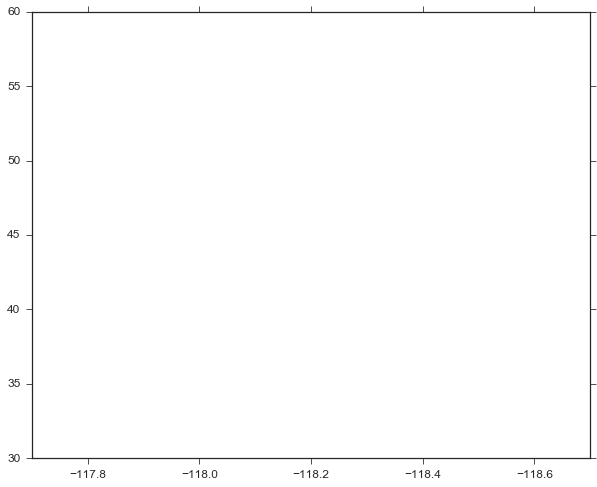

In [68]:
plt.scatter(b['longitude'],b['latitude'])


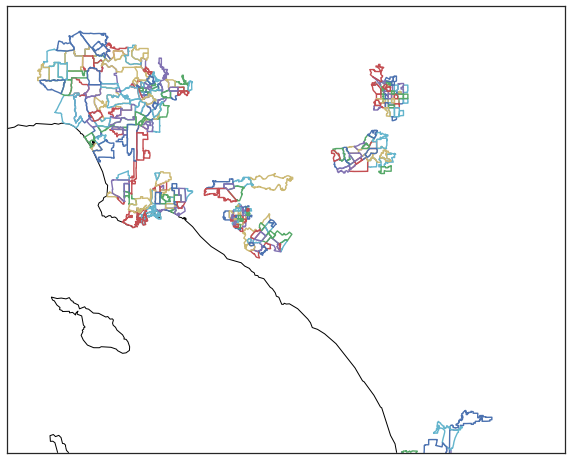

In [71]:
pylab.rcParams['figure.figsize'] = (10,8)

m = Basemap(width=200000,height=160000,projection='lcc',
            resolution='h',lat_1=34.0,lat_2=34.5,lat_0=33.7, lon_0=-117.7)
m.drawcoastlines()

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    bx, by = m(np.array(b['longitude']), np.array(b['latitude']))
    m.plot(x,y)
    
m.scatter(bx,by, s = 1, lw = 0)

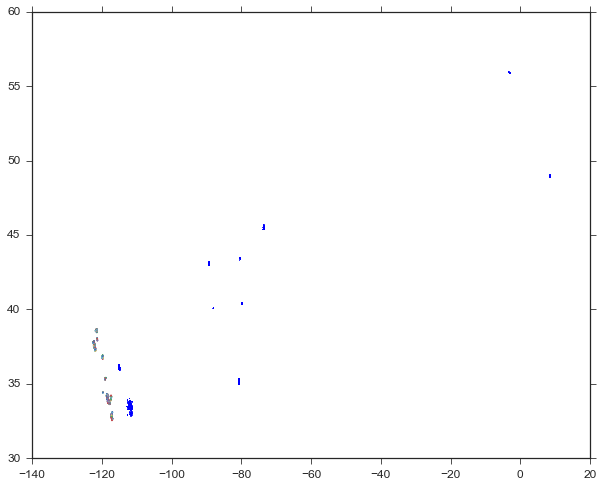

In [85]:
for shape in sf.shapes():
    plt.plot(np.array(shape.points).T[0], np.array(shape.points).T[1])
plt.scatter(b['longitude'] ,b['latitude'], lw = 0, s = 1)


(array([  3.55970000e+04,   2.46920000e+04,   0.00000000e+00,
          4.49100000e+03,   3.27800000e+03,   4.94400000e+03,
          1.06200000e+03,   5.00000000e+00,   0.00000000e+00,
          3.37600000e+03]),
 array([ 32.8636885 ,  35.18097414,  37.49825978,  39.81554541,
         42.13283105,  44.45011669,  46.76740233,  49.08468797,
         51.4019736 ,  53.71925924,  56.03654488]),
 <a list of 10 Patch objects>)

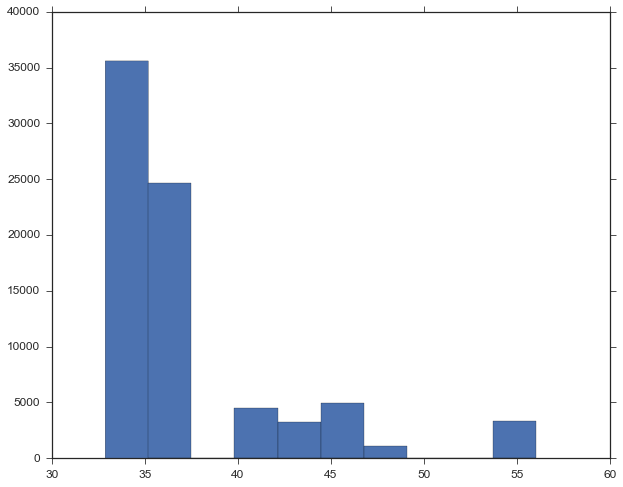

In [86]:
plt.hist(b['latitude'])
